# Outline
    Will be fixed later

## About Data

### Data Set Information:

This research aimed at the case of customers default payments in Taiwan and compares the predictive accuracy of probability of default among six data mining methods. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. Because the real probability of default is unknown, this study presented the novel Sorting Smoothing Method to estimate the real probability of default. 

### Attribute Information:

- This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
---
- Limit Balance: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
- Sex: Gender (1 = male; 2 = female).
- Education: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
- Mariage: Marital status (1 = married; 2 = single; 3 = others).
- Age: Age (year).
---
- Pay1 - Pay6: History of past payment.
- pay 1 = the repayment status in September, 2005
- pay 2 = the repayment status in August, 2005
- pay 3 = the repayment status in July, 2005
- pay 4 = the repayment status in June, 2005
- pay 5 = the repayment status in May, 2005
- pay 6 = the repayment status in April, 2005
- The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
---
- Bill 1- Bill 6: Amount of bill statement (NT dollar). 
- bill 1 = amount of bill statement in September, 2005
- bill 2 = amount of bill statement in August, 2005
- bill 3 = amount of bill statement in July, 2005
- bill 4 = amount of bill statement in June, 2005
- bill 5 = amount of bill statement in May, 2005
- bill 6 = amount of bill statement in April, 2005
---

- Pay amt 1 - Pay amt 6: Amount of previous payment (NT dollar). 
- pay amt 1 = amount paid in September, 2005
- pay amt 2 = amount paid in August, 2005
- pay amt 3 = amount paid in July, 2005
- pay amt 4 = amount paid in June, 2005
- pay amt 5 = amount paid in May, 2005
- pay amt6 = amount paid in April, 2005

## Import Libraries

In [3964]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import mutual_info_score
from sklearn.metrics import roc_auc_score

from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score,mean_absolute_error,mean_squared_error,r2_score


## Import Data

In [3965]:
df = pd.read_excel('dataset/default-of-credit-card-clients.xls', skiprows= 1)

In [3966]:
df.to_csv('default-of-credit-card-clients.csv', index= False)

In [3967]:
# a copy of original dataset
df_copy = df.copy()

In [3968]:
df.head().T

,0,1,2,3,4
ID,1,2,3,4,5
LIMIT_BAL,20000,120000,90000,50000,50000
SEX,2,2,2,2,1
EDUCATION,2,2,2,2,2
MARRIAGE,1,2,2,1,1
AGE,24,26,34,37,57
PAY_0,2,-1,0,0,-1
PAY_2,2,2,0,0,0
PAY_3,-1,0,0,0,-1
PAY_4,-1,0,0,0,0


In [3969]:
df.info() 

# there is no missing value
# all variables are integer

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

## Data Preparation and Cleaning

In [3970]:
# i will remove the id 
del df['ID']

In [3971]:
# rename the default payment next month 
df.rename(columns = {'default payment next month':'default_payment'}, inplace = True)

In [3972]:
# rename the pay_0 to pay_1
df.rename(columns = {'PAY_0':'PAY_1'}, inplace = True)

In [3973]:
# convert columns name  to lowercase
df.columns = df.columns.str.lower()

In [3974]:
df.columns

Index(['limit_bal', 'sex', 'education', 'marriage', 'age', 'pay_1', 'pay_2',
       'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt1', 'bill_amt2',
       'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6', 'pay_amt1',
       'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6',
       'default_payment'],
      dtype='object')

### Mapping on Categorilca Varieables

#### Categorical Variables 

- Sex: (1 = male; 2 = female).
- Education: (1 = graduate school; 2 = university; 3 = high school; 4 = others).
- Marial status: (1 = married; 2 = single; 3 = others).
-  the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.

##### For Payment Status

In [3975]:
pay_status = ['pay_1', 'pay_2',
       'pay_3', 'pay_4', 'pay_5', 'pay_6']

for i in pay_status:
    print(df[i].nunique())
    print(df[i].value_counts().head(2))

11
 0    14737
-1     5686
Name: pay_1, dtype: int64
11
 0    15730
-1     6050
Name: pay_2, dtype: int64
11
 0    15764
-1     5938
Name: pay_3, dtype: int64
11
 0    16455
-1     5687
Name: pay_4, dtype: int64
10
 0    16947
-1     5539
Name: pay_5, dtype: int64
10
 0    16286
-1     5740
Name: pay_6, dtype: int64


In [3976]:
df['pay_4'].value_counts().head(2)

 0    16455
-1     5687
Name: pay_4, dtype: int64

- When we look at the dataset there is 0 values and we don't know what is zero it could be nan values so i don't use this variables.
- Almost half of the data is 0 and we don't know exactly what 0 is, likewise there is an unknown -2.

- I will remove the values that are 0 from the dataset

In [3977]:
for i in pay_status:
    df = df.loc[(df[i] != 0)]


- add one to payment status to fix 

In [3978]:
for i in pay_status:
    df[i] = df[i] + 1

##### For sex

In [3979]:
df.sex.value_counts() 
# there is no problem. 
# there are two types as know

2    5580
1    3247
Name: sex, dtype: int64

In [3980]:
sex_values = {
    1: 'male',
    2: 'female'
}

df.sex = df.sex.map(sex_values)

##### For education

In [3981]:
df.education.value_counts() 
# there is a problem. 
# there are 7 types but we just know about 4 types
# Education: (1 = graduate school; 2 = university; 3 = high school; 4 = others).

# so i will change 0, 5 and 6 to 4(other)

1    4094
2    3369
3    1248
5      50
4      44
6      13
0       9
Name: education, dtype: int64

In [3982]:
df['education'] =  df['education'].replace([0, 5, 6], 4)
# now there are just 4 types

In [3983]:
education_values = {
    1: 'graduate school',
    2: 'university',
    3: 'high school',
    4: 'other'
}

df.education = df.education.map(education_values)

##### For marriage

In [3984]:
df.marriage.value_counts() 
# there is a problem. 
# there are 4 types but we just know about 3 types
# Marial status: (1 = married; 2 = single; 3 = others).

# so i will change 0 to 3(other)

1    4483
2    4265
3      59
0      20
Name: marriage, dtype: int64

In [3985]:
df['marriage'] =  df['marriage'].replace(0, 3)

In [3986]:
marriage_values = {
    1: 'married',
    2: 'single',
    3: 'other'
}

df.marriage = df.marriage.map(marriage_values)

### Split the Data

- split data  / train - valid - test ==> %60 - %20 - %20

In [3987]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state= 53)

In [3988]:
df_train, df_val = train_test_split(df_full_train, test_size= 0.25, random_state=53)

In [3989]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
df_full_train = df_full_train.reset_index(drop=True)

In [3990]:
df_full_train.shape, df_train.shape, df_val.shape, df_test.shape
# splitting is succesful

((7061, 24), (5295, 24), (1766, 24), (1766, 24))

#### Create y

In [3991]:
y_full_train = df_full_train.default_payment.values
y_train = df_train.default_payment.values
y_val = df_val.default_payment.values
y_test = df_test.default_payment.values

In [3992]:
del df_full_train['default_payment']
del df_train['default_payment']
del df_val['default_payment']
del df_test['default_payment']

#### Dict Vectorizer

In [3993]:
full_train_dicts = df_full_train.to_dict(orient='records')
train_dicts = df_train.to_dict(orient='records')
val_dicts = df_val.to_dict(orient='records')
test_dicts = df_test.to_dict(orient='records')

In [3994]:
dv = DictVectorizer(sparse=False)

##### Create X

In [3995]:
X_full_train =  dv.fit_transform(full_train_dicts)
X_train = dv.transform(train_dicts)
X_val = dv.transform(val_dicts)
X_test = dv.transform(test_dicts)

In [3996]:
dv.get_feature_names_out()

array(['age', 'bill_amt1', 'bill_amt2', 'bill_amt3', 'bill_amt4',
       'bill_amt5', 'bill_amt6', 'education=graduate school',
       'education=high school', 'education=other', 'education=university',
       'limit_bal', 'marriage=married', 'marriage=other',
       'marriage=single', 'pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5',
       'pay_6', 'pay_amt1', 'pay_amt2', 'pay_amt3', 'pay_amt4',
       'pay_amt5', 'pay_amt6', 'sex=female', 'sex=male'], dtype=object)

## EDA

### Data Preprocessing

In [3997]:
pay_amt = ['pay_amt1','pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6']

In [3998]:
df[pay_amt].describe().round(1)

# there is an anamolly in pay_amt2
# pay_amt2 max value is very big.

,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6
count,8827.0,8827.0,8827.0,8827.0,8827.0,8827.0
mean,4152.8,4304.7,3990.1,3850.5,4250.5,4377.8
std,12310.7,22027.2,13024.4,11689.5,14950.6,15868.9
min,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0
50%,770.0,641.0,527.0,530.0,477.0,423.0
75%,3500.0,3384.0,3063.0,2915.0,3000.0,2956.0
max,298887.0,1684259.0,417588.0,265852.0,379267.0,403500.0


In [3999]:
bill_amt =['bill_amt1', 'bill_amt2','bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6']

In [4000]:
df[bill_amt].describe().round(1)

,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6
count,8827.0,8827.0,8827.0,8827.0,8827.0,8827.0
mean,13590.4,12969.1,12859.5,12527.7,12292.8,12582.6
std,35577.9,34308.5,38161.2,34028.1,33266.4,34404.8
min,-14386.0,-69777.0,-61506.0,-65167.0,-53007.0,-339603.0
25%,108.0,0.0,0.0,0.0,0.0,0.0
50%,1761.0,1427.0,1160.0,1006.0,952.0,986.0
75%,9124.0,8457.5,8041.5,7742.5,7501.5,7670.5
max,581775.0,572677.0,1664089.0,486776.0,503914.0,527711.0


#### Value Ranges

In [4001]:
cVar =  ['limit_bal','age','bill_amt1','pay_amt2'] # continuous var

In [4002]:
df[cVar].describe().round(1)

,limit_bal,age,bill_amt1,pay_amt2
count,8827.0,8827.0,8827.0,8827.0
mean,199872.0,36.7,13590.4,4304.7
std,128347.9,9.0,35577.9,22027.2
min,10000.0,21.0,-14386.0,0.0
25%,100000.0,30.0,108.0,0.0
50%,190000.0,35.0,1761.0,641.0
75%,280000.0,42.0,9124.0,3384.0
max,800000.0,75.0,581775.0,1684259.0


In [4003]:
print('It is seen that there are different value ranges.')
print(df.limit_bal.min(), df.limit_bal.max())
print(df.age.min(), df.age.max())
print(df.bill_amt1.min(), df.bill_amt1.max())
print(df.pay_amt2.min(), df.pay_amt2.max())

It is seen that there are different value ranges.
10000 800000
21 75
-14386 581775
0 1684259


### Data Visualization

#### Histogram

##### Amount of previous payment 

In [4004]:
df['pay_amt1'].value_counts().head()

0       3211
390      139
2000     124
3000      73
1000      65
Name: pay_amt1, dtype: int64

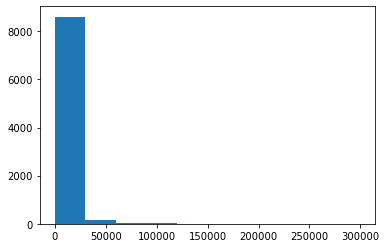

In [4005]:
# Linear scale
plt.hist('pay_amt1', data =df)

plt.show()

# we could not get a meaningful plot

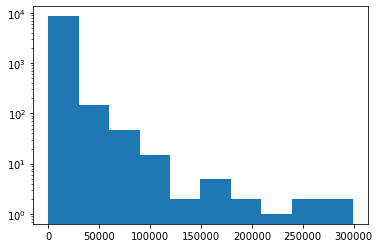

In [4006]:
# Log scale
plt.hist('pay_amt1', log = True, data =df)

plt.show()

# right skewed

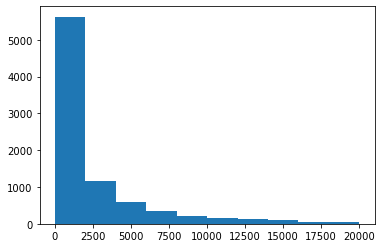

In [4007]:
# Linear scale
plt.hist('pay_amt1', data =df,range = [0, 20000])

plt.show()

# between 0 -20k range there is a right skewed data.

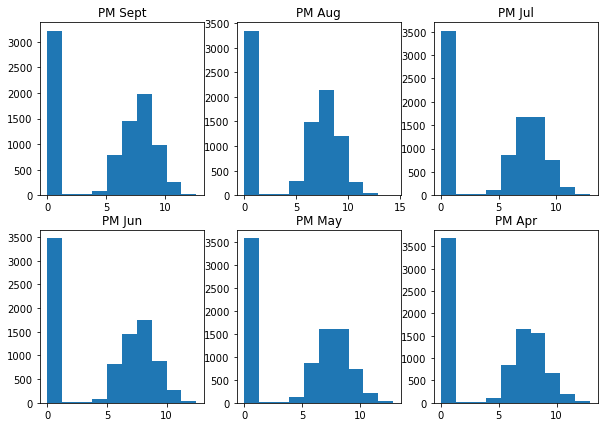

In [4008]:
# we can see the distribution of pay amounts with log values

figure, axis = plt.subplots(2, 3, figsize=(10, 7))
figure = figsize=(3, 3)
  
# For Sine Function
axis[0, 0].hist(np.log1p(df['pay_amt1']))
axis[0, 0].set_title("PM Sept")
  
# For Cosine Function
axis[0, 1].hist(np.log1p(df['pay_amt2']))
axis[0, 1].set_title("PM Aug")

# For Cosine Function
axis[0, 2].hist(np.log1p(df['pay_amt3']))
axis[0, 2].set_title("PM Jul")
  
# For Tangent Function
axis[1, 0].hist(np.log1p(df['pay_amt4']))
axis[1, 0].set_title("PM Jun")
  
# For Tanh Function
axis[1, 1].hist(np.log1p(df['pay_amt5']))
axis[1, 1].set_title("PM May")

# For Tanh Function
axis[1, 2].hist(np.log1p(df['pay_amt6']))
axis[1, 2].set_title("PM Apr")
  
# Combine all the operations and display
plt.show()

##### Amount of bill statement 

In [4009]:
df['bill_amt1'].value_counts().head()

0       1733
390      175
2500      58
316       55
780       52
Name: bill_amt1, dtype: int64

In [4010]:
df['bill_amt1'].describe()

count      8827.000000
mean      13590.405574
std       35577.931198
min      -14386.000000
25%         108.000000
50%        1761.000000
75%        9124.000000
max      581775.000000
Name: bill_amt1, dtype: float64

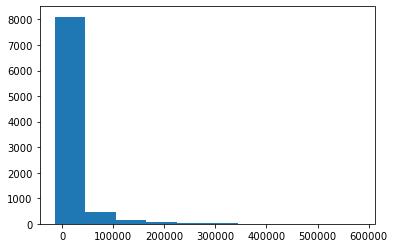

In [4011]:
# Linear scale
plt.hist('bill_amt1', data =df)

plt.show()

# we could not get a meaningful plot

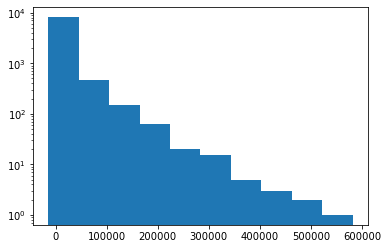

In [4012]:
# Log scale
plt.hist('bill_amt1', log = True, data =df)

plt.show()

# right skewed

In [4013]:
df['bill_amt1'].tail()

29985        0
29986     2220
29989     3425
29991     2500
29994    72557
Name: bill_amt1, dtype: int64

#### Box plot

##### Amount of previous payment 

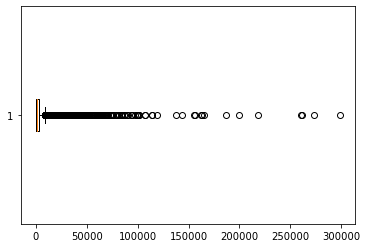

In [4014]:
# Lienar scale
plt.boxplot('pay_amt1', vert=False, data =df)

plt.show()

# there is a lot of outlier

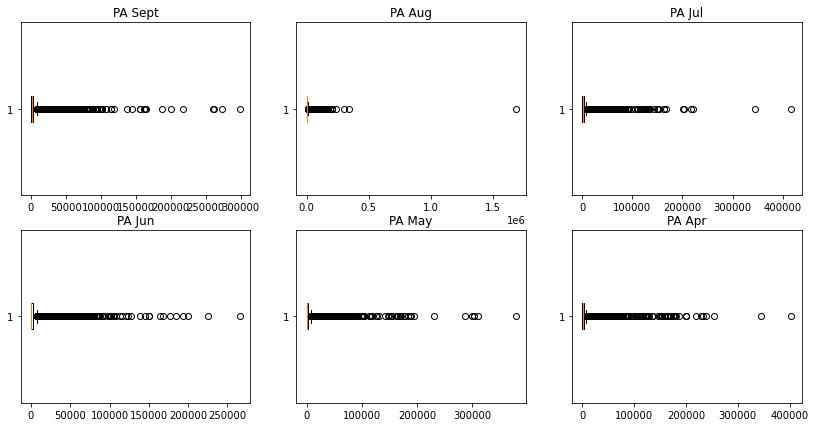

In [4015]:
# we can see the outliers of pay amounts

figure, axis = plt.subplots(2, 3, figsize=(14, 7))

axis[0, 0].boxplot('pay_amt1', vert=False, data =df)
axis[0, 0].set_title("PA Sept")
  
axis[0, 1].boxplot('pay_amt2', vert=False, data =df)
axis[0, 1].set_title("PA Aug")

axis[0, 2].boxplot('pay_amt3', vert=False, data =df)
axis[0, 2].set_title("PA Jul")
  
axis[1, 0].boxplot('pay_amt4', vert=False, data =df)
axis[1, 0].set_title("PA Jun")
  
axis[1, 1].boxplot('pay_amt5', vert=False, data =df)
axis[1, 1].set_title("PA May")

axis[1, 2].boxplot('pay_amt6', vert=False, data =df)
axis[1, 2].set_title("PA Apr")
  
# Combine all the operations and display
plt.show()

##### Amount of bill statement 

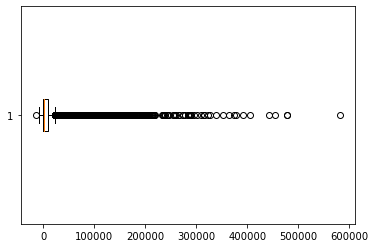

In [4016]:
# Lienar scale
plt.boxplot('bill_amt1', vert=False, data =df)

plt.show()

# there is a lot of outlier

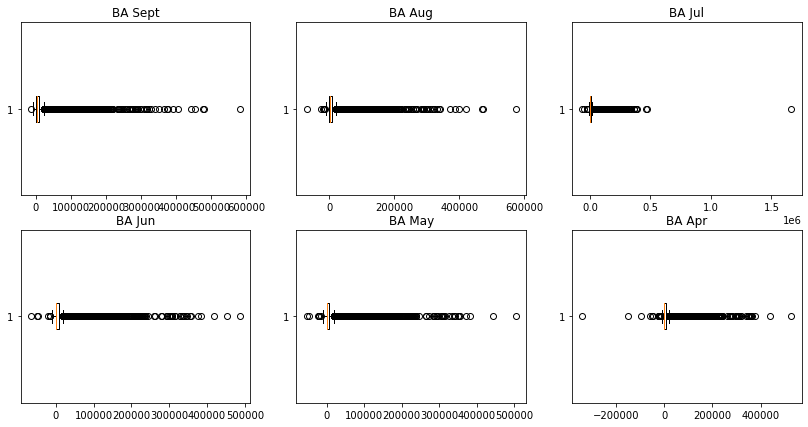

In [4017]:
# we can see the outliers of pay amounts

figure, axis = plt.subplots(2, 3, figsize=(14, 7))

axis[0, 0].boxplot('bill_amt1', vert=False, data =df)
axis[0, 0].set_title("BA Sept")
  
axis[0, 1].boxplot('bill_amt2', vert=False, data =df)
axis[0, 1].set_title("BA Aug")

axis[0, 2].boxplot('bill_amt3', vert=False, data =df)
axis[0, 2].set_title("BA Jul")
  
axis[1, 0].boxplot('bill_amt4', vert=False, data =df)
axis[1, 0].set_title("BA Jun")
  
axis[1, 1].boxplot('bill_amt5', vert=False, data =df)
axis[1, 1].set_title("BA May")

axis[1, 2].boxplot('bill_amt6', vert=False, data =df)
axis[1, 2].set_title("BA Apr")
  
# Combine all the operations and display
plt.show()

#### Count plot

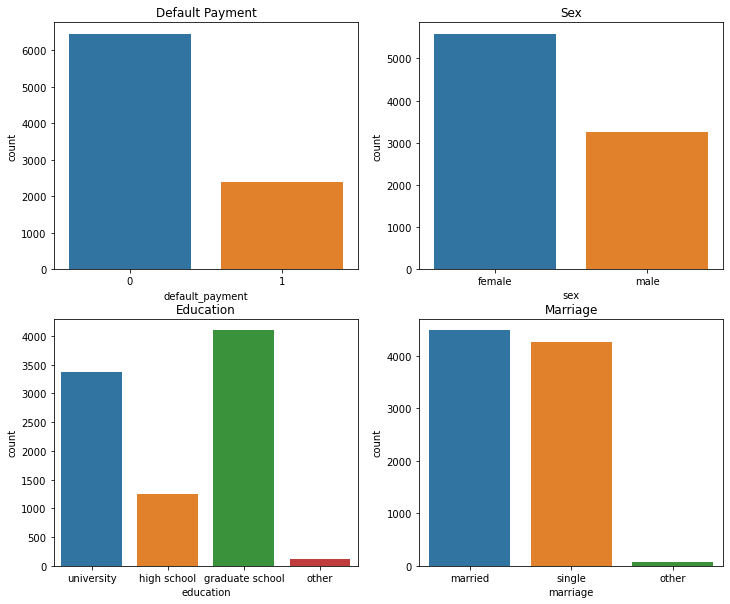

In [4018]:
# we can see the outliers of pay amounts

figure, axis = plt.subplots(2, 2, figsize=(12,10 ))
  
sns.countplot(ax=axis[0,0], x=df['default_payment'])
axis[0,0].set_title('Default Payment')

# For Cosine Function
sns.countplot(ax=axis[0,1], x=df['sex'])
axis[0, 1].set_title("Sex")


sns.countplot(ax=axis[1,0], x=df['education'])
axis[1, 0].set_title("Education")
  
# For Tanh Function
sns.countplot(ax=axis[1,1], x=df['marriage'])
axis[1, 1].set_title("Marriage")


# Combine all the operations and display
plt.show()

##### Look at the target variable

In [4019]:
# our target variable is default_payment 
# default payment (Yes = 1, No = 0)

In [4020]:
df.default_payment.value_counts(normalize=True)

0    0.729353
1    0.270647
Name: default_payment, dtype: float64

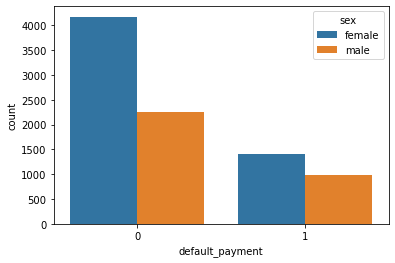

In [4021]:
sns.countplot(x='default_payment',hue = 'sex', data=df)
plt.show()

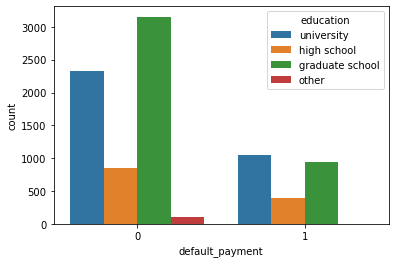

In [4022]:
sns.countplot(x='default_payment',hue = 'education', data=df)
plt.show()

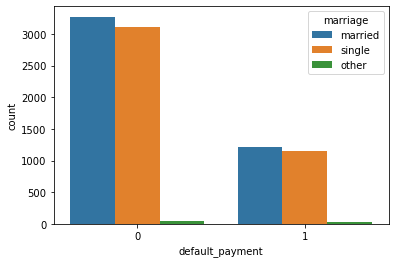

In [4023]:
sns.countplot(x='default_payment',hue = 'marriage', data=df)
plt.show()

##  Feature importance

### Mutual information

In [4024]:
def mutual_info_default_pay(series):
    return mutual_info_score(series, df.default_payment)

In [4025]:
categorical = ['sex', 'education', 'marriage', 'pay_1', 'pay_2',
       'pay_3', 'pay_4', 'pay_5', 'pay_6']

In [4026]:
mi = df[categorical].apply(mutual_info_default_pay)

In [4027]:
mi.sort_values(ascending=False)

pay_1        0.086407
pay_2        0.078619
pay_5        0.075346
pay_4        0.074768
pay_3        0.072600
pay_6        0.072244
education    0.006688
sex          0.001533
marriage     0.000076
dtype: float64

In [4028]:
mi = mi.sort_values(ascending=True)

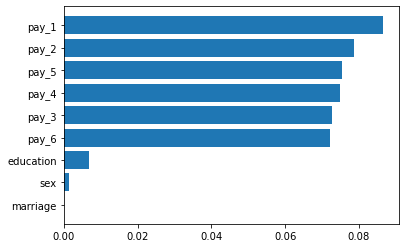

In [4029]:
plt.barh(mi.index, mi.values)
plt.show()

### Correlation

In [4030]:
numerical = ['limit_bal', 'age', 'bill_amt1', 'bill_amt2',
       'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6', 'pay_amt1',
       'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6']

In [4031]:
corr = df[numerical].corrwith(df.default_payment).abs().sort_values(ascending=True) 

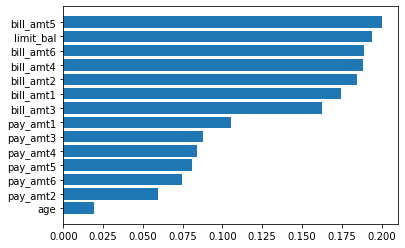

In [4032]:
plt.barh(corr.index, corr.values)
plt.show()

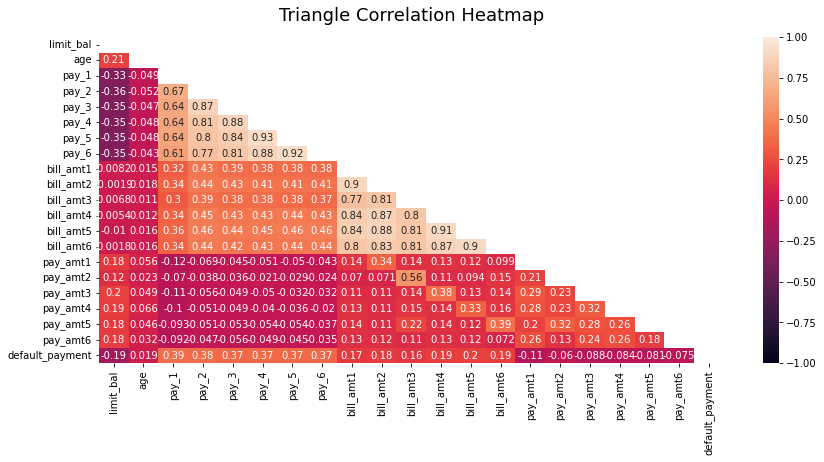

In [4033]:
plt.figure(figsize=(14, 6))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(df.corr()))
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True)
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

## Models

In [4034]:
models = []

### Logistic Regression

In [4035]:
model = LogisticRegression(max_iter= 300)

- when solver is sag i got this warning 

ConvergenceWarning: The max_iter was reached which means the coef_ did not converge

- when solver is lbfgs i got this warning

ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

- to solve this warning i set max_iter > 200

In [4036]:
model.fit(X_train, y_train )

LogisticRegression(max_iter=300)

In [4037]:
model.score(X_val, y_val)

0.7644394110985278

In [4038]:
model.score(X_test, y_test)

0.7746319365798414

In [4039]:
y_pred = model.predict_proba(X_val)[:,1]

In [4040]:
roc_auc_score(y_val,y_pred)

0.7200475539052831

In [4041]:
y_pred= model.predict(X_val)

              precision    recall  f1-score   support

           0      0.782     0.940     0.854      1290
           1      0.639     0.290     0.399       476

    accuracy                          0.764      1766
   macro avg      0.710     0.615     0.626      1766
weighted avg      0.743     0.764     0.731      1766



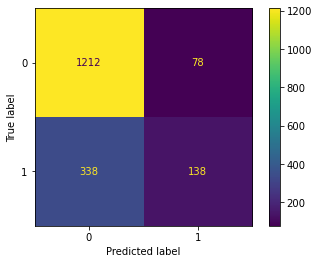

In [4042]:
# print classification report
print(classification_report(y_val, y_pred, digits=3))

# show confusion matrix
ConfusionMatrixDisplay.from_predictions(y_val, y_pred)
plt.show()

#### Logistic Regression Tuning

In [4043]:
c_values = [100, 10, 1.0, 0.1, 0.01]
scores = []

for c in c_values:
    model_name = 'Logistic Regression'
    model = model = LogisticRegression(max_iter= 300, C = c)
    model.fit(X_train, y_train)
    
    y_pred = model.predict_proba(X_val)[:, 1]
    y_pred2 = model.predict(X_val)
    auc=roc_auc_score(y_val, y_pred)
    acc = accuracy_score(y_val, y_pred2 )
    prec = precision_score(y_val, y_pred2)
    rec = recall_score(y_val, y_pred2)
    f1 = f1_score(y_val, y_pred2)
    
    scores.append((c,model_name,auc,acc,prec,rec,f1))

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [4044]:
columns = ['C','model_mame', 'auc','accuracy','prec','rec','f1']
df_scores = pd.DataFrame(scores, columns=columns)

In [4045]:
df_scores.sort_values('f1',ascending=False).head()

,C,model_mame,auc,accuracy,prec,rec,f1
2,1.00,Logistic Regression,0.720048,0.764439,0.638889,0.289916,0.398844
4,0.01,Logistic Regression,0.723528,0.753114,0.629870,0.203782,0.307937
0,100.00,Logistic Regression,0.723476,0.751982,0.625000,0.199580,0.302548
1,10.00,Logistic Regression,0.723464,0.751982,0.625000,0.199580,0.302548
3,0.10,Logistic Regression,0.723466,0.751982,0.625000,0.199580,0.302548


- i will chose the best C = 1.00

In [4046]:
models.append(tuple(df_scores.loc[2,'model_mame':]))

### Decision Trees

In [4047]:
dt = DecisionTreeClassifier()

In [4048]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [4049]:
dt.score(X_val, y_val)

0.6891279728199321

In [4050]:
y_pred = dt.predict_proba(X_val)[:,1]

In [4051]:
roc_auc_score(y_val,y_pred)

0.6209375610709401

#### Decision Trees Tuning

- Selecting best depth

In [4052]:
depths = [1, 2, 3, 4, 5, 6,7,8,9,10, 15, 20, None]

for depth in depths: 
    dt = DecisionTreeClassifier(max_depth=depth)
    dt.fit(X_train, y_train)
    
    y_pred = dt.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    score = dt.score(X_val, y_val)
    print('%4s -> %.3f -> %.3f' % (depth, auc,score))
    
# best depth is 3,4,5,2

   1 -> 0.704 -> 0.790
   2 -> 0.749 -> 0.794
   3 -> 0.755 -> 0.790
   4 -> 0.750 -> 0.786
   5 -> 0.750 -> 0.792
   6 -> 0.748 -> 0.790
   7 -> 0.737 -> 0.785
   8 -> 0.729 -> 0.780
   9 -> 0.719 -> 0.781
  10 -> 0.707 -> 0.772
  15 -> 0.661 -> 0.730
  20 -> 0.634 -> 0.706
None -> 0.618 -> 0.685


- selecting depth and min samples leaf

In [4053]:
scores = []
for depth in [2,3, 4,5]:
    for s in range(1,110):
        dt = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=s)
        dt.fit(X_train, y_train)

        y_pred = dt.predict_proba(X_val)[:, 1]
        y_pred2 = dt.predict(X_val)
        auc=roc_auc_score(y_val, y_pred)
        acc = accuracy_score(y_val, y_pred2 )
        prec = precision_score(y_val, y_pred2)
        rec = recall_score(y_val, y_pred2)
        f1 = f1_score(y_val, y_pred2)
        
        scores.append((depth, s, model_name,auc,acc,prec,rec,f1))

In [4054]:
columns = ['max_depth', 'min_samples_leaf','model_name', 'auc','accuracy','prec','rec','f1']
df_scores = pd.DataFrame(scores, columns=columns)

In [4055]:
df_scores.sort_values('auc',ascending=False).head(7)

,max_depth,min_samples_leaf,model_name,auc,accuracy,prec,rec,f1
268,4,51,Logistic Regression,0.766127,0.797848,0.695082,0.445378,0.542894
254,4,37,Logistic Regression,0.765712,0.796149,0.687097,0.447479,0.541985
267,4,50,Logistic Regression,0.765698,0.797848,0.695082,0.445378,0.542894
266,4,49,Logistic Regression,0.765698,0.797848,0.695082,0.445378,0.542894
253,4,36,Logistic Regression,0.765640,0.797848,0.691318,0.451681,0.546379
251,4,34,Logistic Regression,0.765609,0.797848,0.691318,0.451681,0.546379
252,4,35,Logistic Regression,0.765609,0.797848,0.691318,0.451681,0.546379


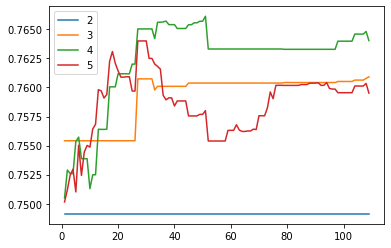

In [4056]:
for d in [2,3, 4,5]:
    df_subset = df_scores[df_scores.max_depth == d]
    
    plt.plot(df_subset.min_samples_leaf, df_subset.auc,label =d)

plt.legend()

- i will chose the best max_depth=4, min_samples_leaf=51

In [4057]:
models.append(tuple(df_scores.loc[268,'model_name':]))

### Random Forest 

In [4058]:
rf =  RandomForestClassifier(random_state=53)

In [4059]:
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=53)

In [4060]:
rf.score(X_val, y_val)

0.7876557191392979

In [4061]:
y_pred = rf.predict_proba(X_val)[:,1]

In [4062]:
roc_auc_score(y_val,y_pred)

0.7628143117712202

#### Random Forest  Tuning

- Looking for best depths

In [4063]:
depths = [1, 2, 3, 4, 5, 6,7,8,9,10, 15, 20, None]

for depth in depths: 
    rf = RandomForestClassifier(max_depth= depth, random_state=53)
    rf.fit(X_train, y_train)
    
    y_pred = rf.predict_proba(X_val)[:, 1]
    y_pred2 = rf.predict(X_val)
    auc = roc_auc_score(y_val, y_pred)
    score = rf.score(X_val, y_val)
    print('%4s -> %.3f -> %.3f' % (depth, auc,score))
    
# best depth is 7, 6, 5 ,3

   1 -> 0.715 -> 0.799
   2 -> 0.773 -> 0.802
   3 -> 0.776 -> 0.801
   4 -> 0.776 -> 0.801
   5 -> 0.776 -> 0.802
   6 -> 0.777 -> 0.802
   7 -> 0.779 -> 0.800
   8 -> 0.776 -> 0.798
   9 -> 0.774 -> 0.801
  10 -> 0.773 -> 0.799
  15 -> 0.772 -> 0.800
  20 -> 0.771 -> 0.797
None -> 0.763 -> 0.788


- Looking for best depths and n estimators

In [4064]:
scores = []
n_estimators = list(range(1,20)) + [20,25,30,35,40,45,50,60,70,90,100]
for d in [7, 6, 5, 4,3,None]:
    for n in n_estimators:
        model_name = 'Random Forest'
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=d,
                                    random_state=53)
        rf.fit(X_train, y_train)
        
        y_pred = rf.predict_proba(X_val)[:, 1]
        y_pred2 = rf.predict(X_val)
        auc=roc_auc_score(y_val, y_pred)
        acc = accuracy_score(y_val, y_pred2 )
        prec = precision_score(y_val, y_pred2)
        rec = recall_score(y_val, y_pred2)
        f1 = f1_score(y_val, y_pred2)
        
        scores.append((str(d), n, model_name,auc,acc,prec,rec,f1))

In [4065]:
columns = ['max_depth', 'n_estimators', 'model_name', 'auc','accuracy','prec','rec','f1']
df_scores = pd.DataFrame(scores, columns=columns)

In [4066]:
df_scores.sort_values('auc',ascending=False).head(10)

,max_depth,n_estimators,model_name,auc,accuracy,prec,rec,f1
26,7,60,Random Forest,0.779432,0.800113,0.694006,0.462185,0.554855
28,7,90,Random Forest,0.779277,0.800113,0.696486,0.457983,0.552598
27,7,70,Random Forest,0.779246,0.801812,0.699367,0.464286,0.558081
25,7,50,Random Forest,0.778664,0.800113,0.694006,0.462185,0.554855
29,7,100,Random Forest,0.778646,0.800113,0.696486,0.457983,0.552598
24,7,45,Random Forest,0.778037,0.802945,0.700000,0.470588,0.562814
20,7,25,Random Forest,0.777766,0.804643,0.705329,0.472689,0.566038
86,5,60,Random Forest,0.777732,0.802378,0.702875,0.462185,0.557668
87,5,70,Random Forest,0.777279,0.801812,0.700637,0.462185,0.556962
17,7,18,Random Forest,0.777199,0.804077,0.708333,0.464286,0.560914


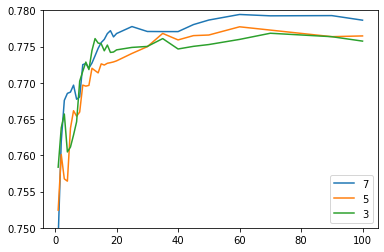

In [4067]:
for d in [7, 5,3]:
    df_subset = df_scores[df_scores.max_depth == str(d)]
    
    plt.plot(df_subset.n_estimators, df_subset.auc,label =d)


plt.ylim([0.75, 0.78])

plt.legend()


In [4068]:
df_scores.loc[15:28,]

,max_depth,n_estimators,model_name,auc,accuracy,prec,rec,f1
15,7,16,Random Forest,0.775996,0.805210,0.707547,0.472689,0.566751
16,7,17,Random Forest,0.776793,0.805210,0.708861,0.470588,0.565657
17,7,18,Random Forest,0.777199,0.804077,0.708333,0.464286,0.560914
18,7,19,Random Forest,0.776340,0.804643,0.707937,0.468487,0.563843
19,7,20,Random Forest,0.776803,0.804077,0.704403,0.470588,0.564232
20,7,25,Random Forest,0.777766,0.804643,0.705329,0.472689,0.566038
21,7,30,Random Forest,0.777085,0.801246,0.698413,0.462185,0.556258
22,7,35,Random Forest,0.777072,0.801246,0.697161,0.464286,0.557377
23,7,40,Random Forest,0.777069,0.804077,0.703125,0.472689,0.565327
24,7,45,Random Forest,0.778037,0.802945,0.700000,0.470588,0.562814


- i will chose the best max_depth=7, n_estimators=25

In [4069]:
models.append(tuple(df_scores.loc[20,'model_name':]))

## Selecting the best model

In [4070]:
columns = ['model_name', 'auc','accuracy','prec','rec','f1']
df_models = pd.DataFrame(models, columns=columns)

In [4071]:
df_models.head()

,model_name,auc,accuracy,prec,rec,f1
0,Logistic Regression,0.720048,0.764439,0.638889,0.289916,0.398844
1,Logistic Regression,0.766127,0.797848,0.695082,0.445378,0.542894
2,Random Forest,0.777766,0.804643,0.705329,0.472689,0.566038


- when we look at the result Decision Tree and Random Forest are close 
- i will choose the Random Forest because it is better on auc score and accuracy
- Random Forest values  max_depth=7, n_estimators=25